In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import os

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [5]:
from src import data

In [36]:
df  = pd.read_csv(
    os.path.join(data.data_root, 'external', 'COVID-19', 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_global.csv')
)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


Oh I see, working with the pivoted and date-normalized data will be easier.

In [49]:
df  = pd.read_csv(
    os.path.join(data.data_root, 'external', 'datahub-covid-19', 'time-series-19-covid-combined_csv.csv'),
    parse_dates=['Date']
)
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


Much better.

In [50]:
df_france = df.loc[
    (df['Country/Region']=='France') & 
    pd.isna(df['Province/State']), 
    [
        'Date',
        'Confirmed',
        'Recovered',
        'Deaths'
    ]
].set_index('Date')
df_france

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0
2020-01-24,2.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,3.0,0.0,0.0
...,...,...,...
2020-04-13,124298.0,27718.0,14967.0
2020-04-14,130253.0,28805.0,15729.0
2020-04-15,133470.0,30955.0,17167.0


In [54]:
import matplotlib.dates as mdates

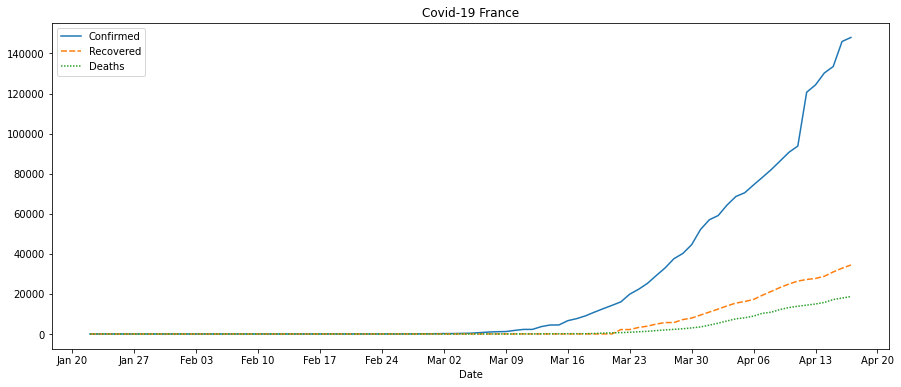

In [60]:
ax = sns.lineplot(data=df_france)
ax.set_title("Covid-19 France")
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
